In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import imageio
import matplotlib.pyplot as plt




In [203]:


main_path = '/home/michal_s/data/CGG_data/'
folder = 'train'
folder2 = 'gt'
path = '{}/{}/{}'.format(main_path,folder,folder2)
filelist = [path + f for f in os.listdir(path)]


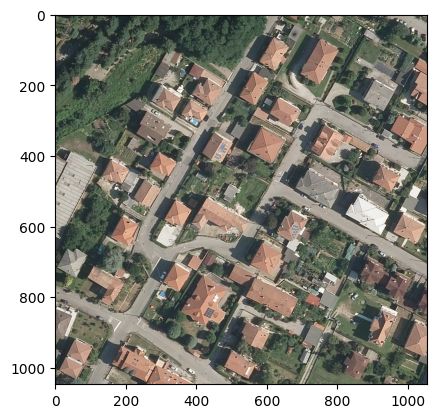

In [204]:
pic = imageio.v2.imread(filepath)
# pic
plt.imshow(pic)

In [218]:
dataset = pd.DataFrame(columns=['folder','file_name','hight','width','dimension'])

main_path = '/home/michal_s/data/CGG_data/'
train_path = '/home/michal_s/data/CGG_data/train/'
n=0

imgs_raising_errors = []
for folder in os.listdir(train_path):
        if not folder.endswith('.json') and not folder.endswith('.DS_Store'):
                # print(folder)
                folder_path = train_path+folder
                # print(folder_path)
                path = folder_path

                for filename in os.listdir(path):
                    filepath = path+'/'+filename
                    try:
                        pic = imageio.v2.imread(filepath)
                        n=n+1
                        
                        img_hight = pic.shape[0] 
                        img_width = pic.shape[1] 
                        img_dim = pic.ndim
                        img_size = pic.size

                        dict= {'file_name' : filename,
                            'folder' : folder,
                                        # 'folder2' : folder2,
                                'hight' : img_hight,
                                'width' : img_width,
                                'dimension' : img_dim,
                                'image_size': img_size,}
                        # print(dict)
                        df1 = pd.DataFrame(dict, index=[n])
                        dataset=pd.concat([dataset,df1])
                    except ValueError:
                        imgs_raising_errors.append(filename)
                        continue
                        
                    #     if exceptions['error']:
                    #         exceptions['error'].add('id')
                    #     else:
                    #         exceptions['error'] = set()
                    #         exceptions['error'].add('id')
                         
                    

/home/michal_s/Envs/michal_env/lib64/python3.7/site-packages/PIL/Image.py:3170: DecompressionBombWarning: Image size (110440500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/michal_s/Envs/michal_env/lib64/python3.7/site-packages/PIL/Image.py:3170: DecompressionBombWarning: Image size (110336800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/michal_s/Envs/michal_env/lib64/python3.7/site-packages/PIL/Image.py:3170: DecompressionBombWarning: Image size (110443200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/michal_s/Envs/michal_env/lib64/python3.7/site-packages/PIL/Image.py:3170: DecompressionBombWarning: Image size (110455200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/michal_s/Envs/michal_env/lib64/python3.7/s

In [221]:
print('hight:')
print(dataset['hight'].describe())

print('width')
print(dataset['width'].describe())

print('image size')
print(dataset['image_size'].describe())

hight:
count     3696
unique      47
top        104
freq       586
Name: hight, dtype: int64
width
count     3696
unique      47
top        105
freq       729
Name: width, dtype: int64
image size
count    3.696000e+03
mean     2.113492e+06
std      1.819998e+07
min      1.428300e+04
25%      3.276000e+04
50%      5.148000e+04
75%      3.310590e+06
max      3.313656e+08
Name: image_size, dtype: float64


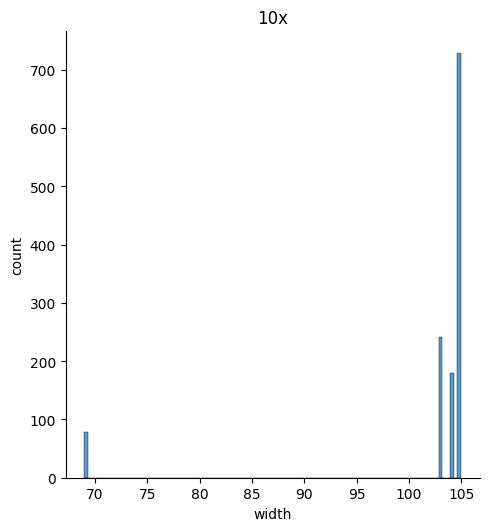

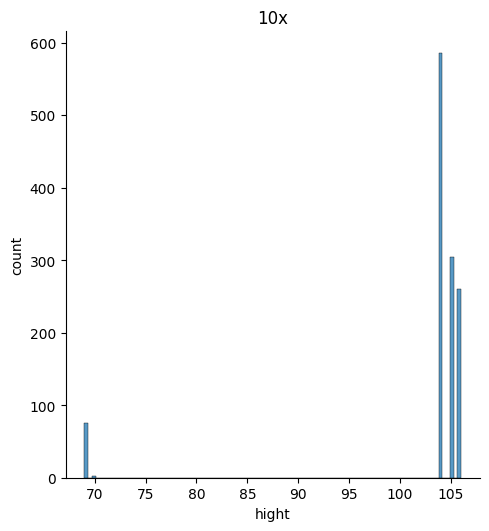

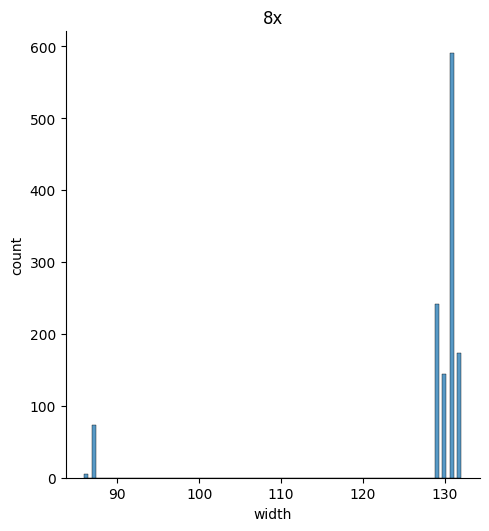

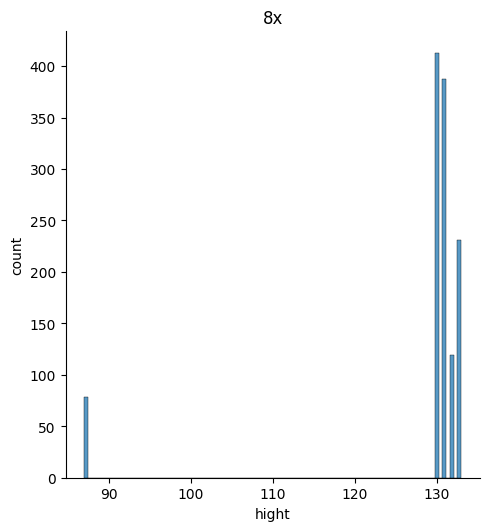

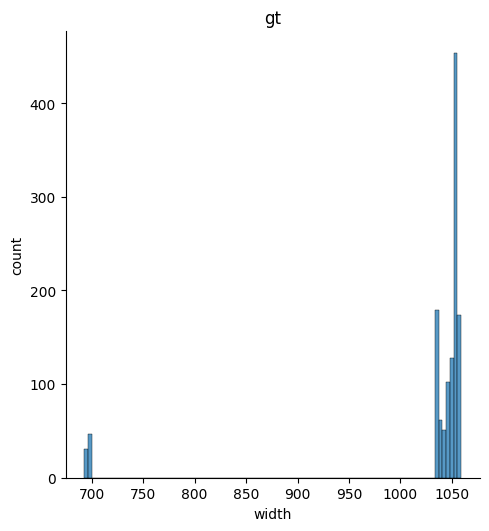

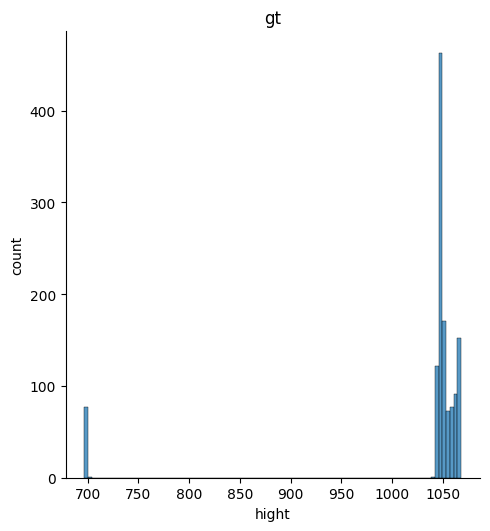

In [220]:
folders_list=['10x','8x','gt']
for foldername in folders_list:
    df = dataset.loc[dataset.folder==foldername]
    widths = df.width.values
    hights = df.hight.values
    sns.displot(widths,bins=100).set(xlabel='width', ylabel='count', title=foldername)  
    sns.displot(hights, bins=100).set(xlabel='hight', ylabel='count', title=foldername)

    

Inspecting specific folder - 10x

In [222]:
x10 = dataset.loc[dataset.folder=='10x']
x10.describe()



,image_size
count,1228.000000
mean,31627.216612
std,4518.063300
min,14283.000000
25%,32754.000000
50%,32760.000000
75%,32760.000000
max,33075.000000


<AxesSubplot:>

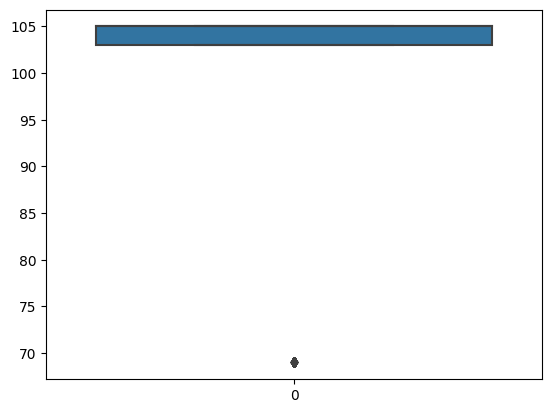

In [223]:
sns.boxplot(x10.width.values)
# x10

In [224]:
# x10.loc[x10.width<75].value_counts()

x10.width.value_counts()


105    729
103    241
104    180
69      78
Name: width, dtype: int64

In [225]:
folders_list=['10x','8x','gt']
for foldername in folders_list:
    df = dataset.loc[dataset.folder==foldername]
    print(foldername)

    print('widths')
    print(df.width.value_counts())

    print('hights')
    print(df.hight.value_counts())

    print('image_size')
    print(df['image_size'].value_counts())


10x
widths
105    729
103    241
104    180
69      78
Name: width, dtype: int64
hights
104    586
105    304
106    260
69      75
70       3
Name: hight, dtype: int64
image_size
32760.0    747
32754.0    241
33075.0    143
14283.0     75
33072.0     19
14490.0      3
Name: image_size, dtype: int64
8x
widths
131    591
129    241
132    174
130    144
87      73
86       5
Name: width, dtype: int64
hights
130    413
131    387
133    231
132    119
87      78
Name: hight, dtype: int64
image_size
51483.0    352
51480.0    283
51090.0    274
51471.0    231
22707.0     73
51084.0     10
22446.0      5
Name: image_size, dtype: int64
gt
widths
1055    185
1054    130
1037     84
1056     79
1052     70
1053     69
1038     59
1051     58
1036     54
1057     51
697      43
1050     43
1058     39
1045     36
1035     35
1047     30
1046     27
1049     27
696      26
1044     23
1042     14
1048      9
1041      8
1043      6
1034      6
1059      5
698       4
1039      3
694       2
695 